# Hotel Rating Classification 

Whenever we are looking for hotels for vacation or travel, we always prefer a hotel known for its services. The best way to find out whether a hotel is right for you or not is to find out what people are saying about the hotel who have stayed there before. Now it is very difficult to read the experience of each person who has given their opinion on the services of the hotel. This is where the task of sentiment analysis comes in.

Well, every industry is now adopting sentiment analysis to assess its reputation in the online market. The hospitality industry is following the same path with hotel reviews sentiment analysis.

# Problem Statement

# In this project, our goal is to examine how travelers are communicating their positive and negative experiences in online platforms for staying in a specific hotel. Our major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.

In [8]:
import pandas as pd
import numpy as np

# Import the dataset

In [9]:
data=pd.read_excel('hotel_reviews.xlsx')

In [10]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


# Text data understanding & checking missing/null values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [12]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [13]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [14]:
data.nunique()

Review    20491
Rating        5
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data["Rating"].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [17]:
len(data)

20491

In [18]:
data.shape

(20491, 2)

# Note:

From above analysis, we can say that there are no null values & duplicate data in our dataset.

# Exploratory Data Analysis(EDA)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import warnings
warnings.filterwarnings("ignore")

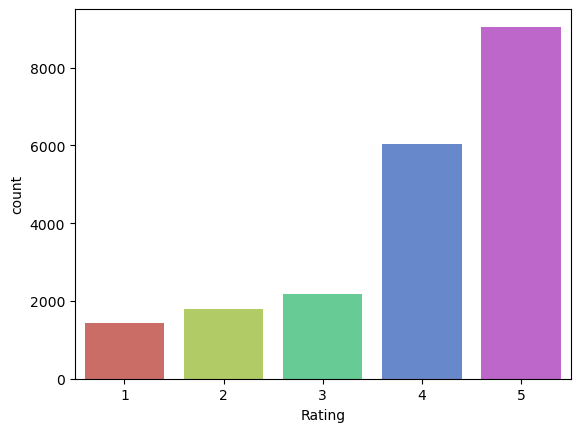

In [21]:
sns.countplot(x='Rating',data=data,palette='hls')
plt.show()

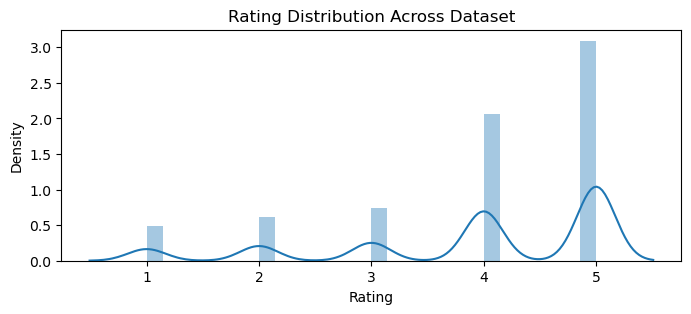

In [22]:
plt.figure(figsize=(8,3))
sns.distplot(data["Rating"])
plt.title("Rating Distribution Across Dataset")
plt.show()

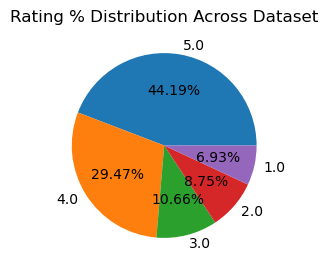

In [23]:
plt.figure(figsize=(10,3))
plt.pie(data['Rating'].value_counts(),labels=['5.0','4.0','3.0','2.0','1.0'],autopct='%1.2f%%')
plt.title("Rating % Distribution Across Dataset")
plt.show()

# Note:

From above visual, we can say that almost 75% of reviews are rated (5, 4) by users and remaining 25% reviews are rated (3, 2, 1).
We have an unequal distribution of data, where we have less no. of negative ratings provided by users.
Hence, our dataset is highly imbalanced dataset.

count    9054.000000
mean       93.963773
std        90.977999
min         7.000000
25%        44.000000
50%        69.000000
75%       111.000000
max      1755.000000
Name: Length, dtype: float64

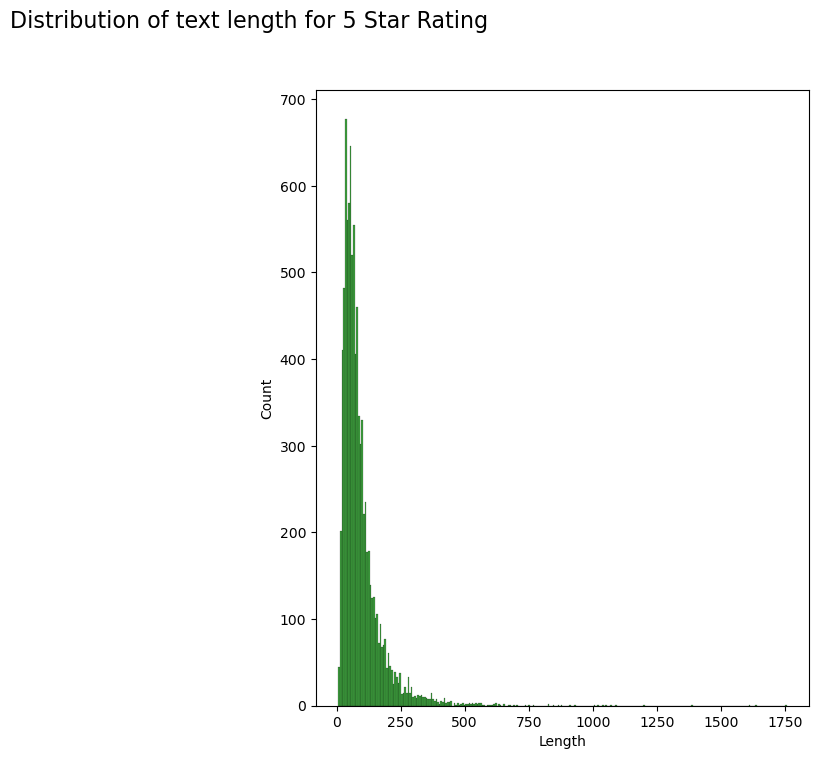

In [24]:
fig = plt.figure(figsize=(14,8))
data["Length"] = data.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Rating']==5]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 5 Star Rating', fontsize=16)
display(data.Length[data.Rating==5].describe())

count    1421.000000
mean      112.365236
std        99.834855
min        12.000000
25%        51.000000
50%        82.000000
75%       137.000000
max       954.000000
Name: Length, dtype: float64

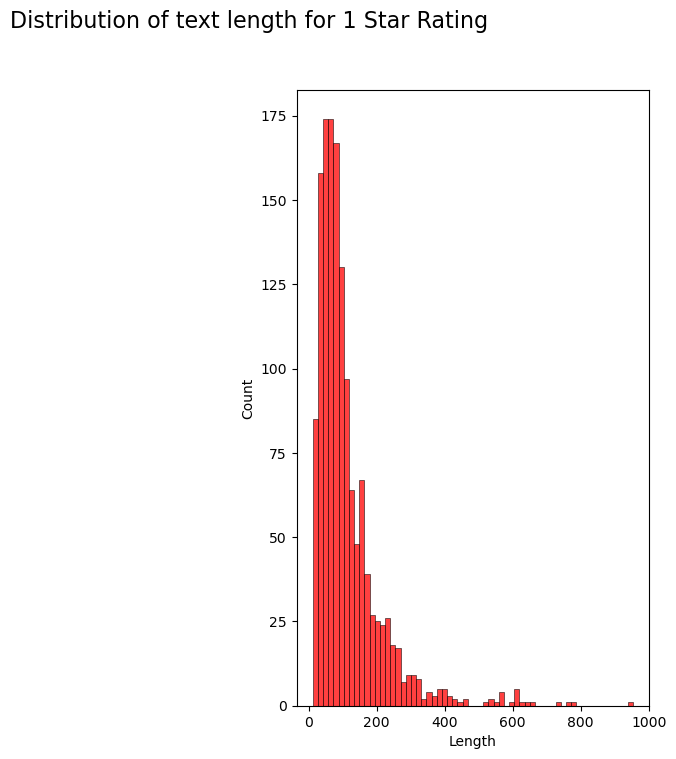

In [25]:
fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_subplot(122)
sns.histplot(data[data["Rating"]==1]["Length"],ax=ax2,color='red')
fig2.suptitle("Distribution of text length for 1 Star Rating",fontsize=16)
display(data.Length[data.Rating==1].describe())

# Text Pre-processing

In [26]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
data['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [32]:
!pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable


In [33]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))

    plt.figure(figsize = (6, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=25)
    plt.show()

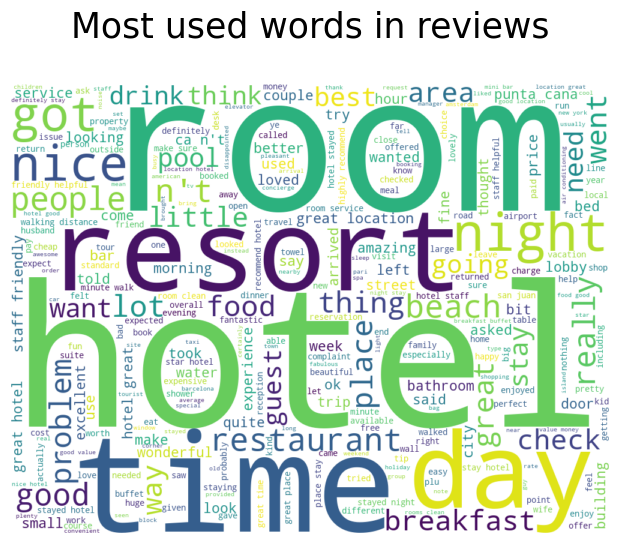

In [34]:
#Plotting the wordcloud on original data for all ratings
wordCloud_generator(data=data['Review'], title="Most used words in reviews\n")

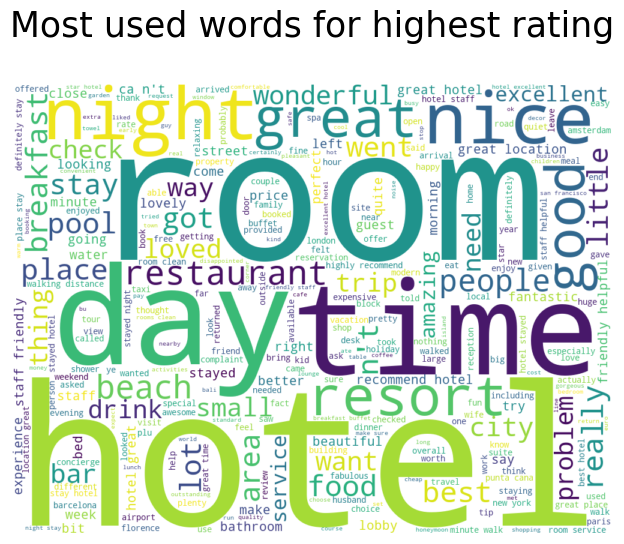

In [35]:
#Pd on original data for all highest rating (5)
wordCloud_generator(data=data[data['Rating']==5]['Review'], title="Most used words for highest rating\n")

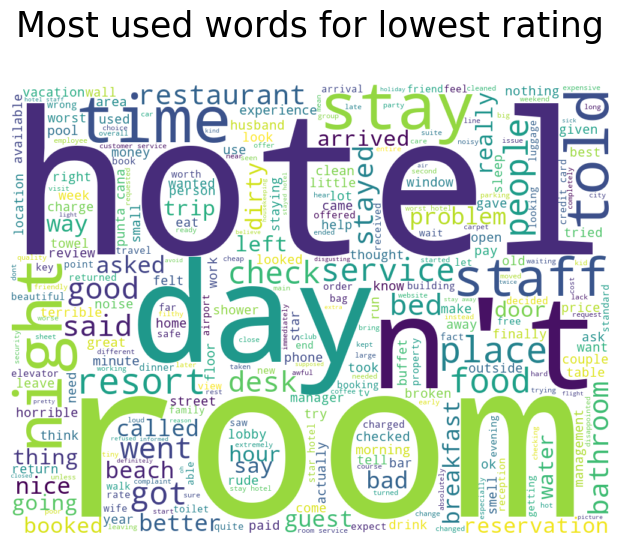

In [36]:
#Plotting t wordcloud on original data for all lowest rating (1)
wordCloud_generator(data=data[data['Rating']==1]['Review'],title="Most used words for lowest rating\n")

# Text data Preprocessing & Cleaning

In [37]:

stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

def clean_text(text):
    # Remove numeric and alpha-numeric characters
    text = re.sub(r'\w*\d\w*', '', str(text)).strip()
    
    # Replace common contractions
    text = re.sub(r"won't", "will not", str(text))
    text = re.sub(r"can't", "can not", str(text))
    text = re.sub(r"ca n\'t", "can not", str(text))      
    text = re.sub(r"wo n\'t", "will not", str(text))     
    text = re.sub(r"\'t've", " not have", str(text))    
    text = re.sub(r"\'d've", " would have", str(text))
    text = re.sub(r"n\'t", " not", str(text))    
    text = re.sub(r"\'re", " are", str(text))     
    text = re.sub(r"\'s", " is", str(text))       
    text = re.sub(r"\'d", " would", str(text))   
    text = re.sub(r"\'ll", " will", str(text))   
    text = re.sub(r"\'t", " not", str(text))     
    text = re.sub(r"\'ve", " have", str(text))    
    text = re.sub(r"\'m", " am", str(text))      
    
    # Remove punctuation and symbols
    text = re.sub('[%s]' % re.escape(string.punctuation), '', str(text))
    
    # Remove extra whitespaces
    text = ' '.join(text.split())
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and apply lemmatization
    tokens = [wnl.lemmatize(word, 'v') for word in tokens if word.lower().strip() not in stop_words]
    
    # Remove duplicate words
    tokens = list(dict.fromkeys(tokens))
    
    # Join tokens into a cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [38]:
data['Cleaned_Review'] = data['Review'].apply(clean_text)

In [39]:
data['Length'] = data['Review'].apply(len)
new_length = data['Length'].sum()

In [40]:
data

,Review,Rating,Length,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expensive park get good deal stay a...
1,ok nothing special charge diamond member hilto...,2,1689,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,600,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay go seahawk game awesome downfall vi...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,best keep secret time stay charm star beat inc...
20487,great location price view hotel great quick pl...,4,306,great location price view hotel quick place si...
20488,"ok just looks nice modern outside, desk staff ...",2,443,ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,hotel theft ruin vacation open sept guests wee...


# Tokenisation

In [41]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
corpusdata=data['Cleaned_Review'].apply(word_tokenize).tolist()
len(corpusdata),data.shape[0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(20491, 20491)

In [42]:
data.Review[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

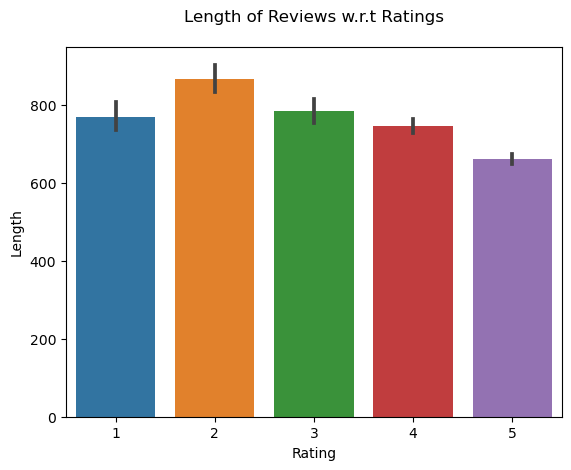

In [43]:
#Visualizing the length of reviews
sns.barplot(data=data, x='Rating', y='Length')
plt.title('Length of Reviews w.r.t Ratings\n')
plt.show()

# Note:

We have successfully completed the text preprocessing.
Let's analyse our data further w.r.t Sentiment Analysis.

# Model Based - Machine Learning

# Naive Bayes & Logistic Regression based Sentiment Analysis

# Label encoding

In [44]:
#Converting the ratings into two labels of Positive & Negative

data['Target'] = data['Rating'].apply(lambda x: 1 if x > 3 else 0)

In [45]:
#Reference for original data for encoded value
data.head()

,Review,Rating,Length,Cleaned_Review,Target
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expensive park get good deal stay a...,1
1,ok nothing special charge diamond member hilto...,2,1689,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experience hotel monaco seattle good...,0
3,"unique, great stay, wonderful time hotel monac...",5,600,unique great stay wonderful time hotel monaco ...,1
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay go seahawk game awesome downfall vi...,1


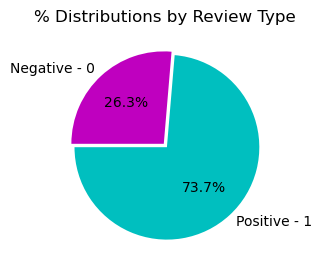

In [46]:

plt.figure(figsize=(10,3))

g = plt.pie(round(data.Target.value_counts(normalize=True)*100,2),explode=(0.025,0.025), 
            labels=['Positive - 1', 'Negative - 0'], colors=["c","m"],
            autopct="%1.1f%%", startangle=180)

plt.title("% Distributions by Review Type")

plt.show()

# Note:

From above visual, we can say that most of the reviews are positive and only around 26% are negative review

# Feature Extraction


TF - IDF

In [47]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
#TF-IDF features
vectorizer = TfidfVectorizer()

# Model Validation

# Spliting input and output data into x and y

In [49]:
#Splitting the variables into features & target
x = data['Cleaned_Review']
y = data['Target']

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16392, 68946)
(16392,)
(4099, 68946)
(4099,)


# Model Building

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,KFold

In [55]:
from sklearn.linear_model import LogisticRegression
# Traning the model
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [56]:
# Testing the model
y_predLR=LR_model.predict(x_test)
y_predLR

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [57]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
LR=confusion_matrix(y_test,y_predLR)
print(LR)
accuracy_score(y_test,y_predLR)

[[ 732  325]
 [  97 2945]]


0.8970480605025616

In [58]:
print(classification_report(y_test,LR_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.69      0.78      1057
           1       0.90      0.97      0.93      3042

    accuracy                           0.90      4099
   macro avg       0.89      0.83      0.85      4099
weighted avg       0.90      0.90      0.89      4099



# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor()
DT_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [60]:
# Testing the model
y_predDT=DT_model.predict(x_test)
y_predDT

array([0., 0., 1., ..., 1., 1., 1.])

In [61]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
DT=confusion_matrix(y_test,y_predDT)
print(DT)
accuracy_score(y_test,y_predDT)

[[ 602  455]
 [ 439 2603]]


0.7818980239082703

In [62]:
print(classification_report(y_test,DT_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.58      0.57      0.57      1057
           1       0.85      0.86      0.85      3042

    accuracy                           0.78      4099
   macro avg       0.71      0.71      0.71      4099
weighted avg       0.78      0.78      0.78      4099



# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
# Testing the model
y_predRF=RF_model.predict(x_test)
y_predRF

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [65]:
#Confusion Matrix and Accuracy
RF=confusion_matrix(y_test,y_predRF)
print(RF)
accuracy_score(y_test,y_predRF)

[[ 340  717]
 [   9 3033]]


0.822883630153696

In [66]:
print(classification_report(y_test,RF_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.32      0.48      1057
           1       0.81      1.00      0.89      3042

    accuracy                           0.82      4099
   macro avg       0.89      0.66      0.69      4099
weighted avg       0.85      0.82      0.79      4099



# Ada Boost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(x_train,y_train)

AdaBoostClassifier()

In [68]:
# Testing the model
y_predada=ada_model.predict(x_test)
y_predada

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
#Confusion Matrix and Accuracy
ada=confusion_matrix(y_test,y_predRF)
print(ada)
accuracy_score(y_test,y_predada)

[[ 340  717]
 [   9 3033]]


0.8553305684313247

In [70]:
print(classification_report(y_test,ada_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70      1057
           1       0.88      0.93      0.91      3042

    accuracy                           0.86      4099
   macro avg       0.82      0.78      0.80      4099
weighted avg       0.85      0.86      0.85      4099



# XGBoost

In [71]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [72]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
# Testing the model
y_predxgb=xgb_model.predict(x_test)
y_predxgb

array([0, 1, 1, ..., 1, 1, 1])

In [74]:
#Confusion Matrix and Accuracy
xgb=confusion_matrix(y_test,y_predxgb)
print(xgb)
accuracy_score(y_test,y_predxgb)

[[ 720  337]
 [ 145 2897]]


0.8824103439863381

In [75]:
print(classification_report(y_test,xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75      1057
           1       0.90      0.95      0.92      3042

    accuracy                           0.88      4099
   macro avg       0.86      0.82      0.84      4099
weighted avg       0.88      0.88      0.88      4099



# Naive Bayes Classifier

In [76]:
from sklearn.naive_bayes import MultinomialNB
NB_model=MultinomialNB()
NB_model.fit(x_train,y_train)

MultinomialNB()

In [77]:
# Testing the model
y_predNB=NB_model.predict(x_test)
y_predNB

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
#Confusion Matrix and Accuracy
NB=confusion_matrix(y_test,y_predNB)
print(NB)
accuracy_score(y_test,y_predNB)

[[  29 1028]
 [   0 3042]]


0.7492071236887046

In [79]:
print(classification_report(y_test,NB_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05      1057
           1       0.75      1.00      0.86      3042

    accuracy                           0.75      4099
   macro avg       0.87      0.51      0.45      4099
weighted avg       0.81      0.75      0.65      4099



# K-Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
# Testing the model
y_predKNN=KNN_model.predict(x_test)
y_predKNN

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [82]:
#Confusion Matrix and Accuracy
KNN=confusion_matrix(y_test,y_predKNN)
print(KNN)
accuracy_score(y_test,y_predKNN)

[[ 393  664]
 [  76 2966]]


0.8194681629665772

In [83]:
print(classification_report(y_test,KNN_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.37      0.52      1057
           1       0.82      0.98      0.89      3042

    accuracy                           0.82      4099
   macro avg       0.83      0.67      0.70      4099
weighted avg       0.82      0.82      0.79      4099



# Support Vector Machines(SVM)

In [84]:
from sklearn.svm import SVC
SVM_model=SVC()
SVM_model.fit(x_train,y_train)

SVC()

In [85]:
# Testing the model
y_predSVM=SVM_model.predict(x_test)
y_predSVM

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [86]:
#Confusion Matrix and Accuracy
SVM=confusion_matrix(y_test,y_predSVM)
print(SVM)
accuracy_score(y_test,y_predSVM)

[[ 755  302]
 [  96 2946]]


0.902903147109051

In [87]:
print(classification_report(y_test,SVM_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1057
           1       0.91      0.97      0.94      3042

    accuracy                           0.90      4099
   macro avg       0.90      0.84      0.86      4099
weighted avg       0.90      0.90      0.90      4099



# ML Pipielines(SVM is better model)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [89]:
# create feature union
features=[]
features.append(('pca',PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_Union=FeatureUnion(features)

In [90]:
# create pipeline
estimators = []
estimators.append(('features_Union', feature_Union))
estimators.append(('SVM', SVC(max_iter=300)))
model = Pipeline(estimators)

In [92]:
# Evaluate pipiline
accuracy_score(y_test,y_predSVM)

0.902903147109051

In [93]:
# save model using pickle and load and predict
from pickle import dump
from pickle import load
import pickle

# Saving the trained model

In [94]:
filename='trained_model.sav'
pickle.dump(SVM_model,open(filename,'wb'))

In [95]:
# loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [96]:
result=loaded_model.score(x_test,y_test)
print(result)

0.902903147109051


# Final Note:

Further deployment of both pretrained & classification based model is made using streamlit for better user-interface testing.

   #                       Thank you!!